<a href="https://colab.research.google.com/github/Priyanka-Kugapriya/Clustering_notebook/blob/main/Hierarchical%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

#changepath to CSV

df= pd.read_csv("/content/sample_data/Layer-Readings_2.csv",header=None)

In [2]:
print(df)

           0        1           2          3   ...   11   12   13     14
0           0        0  329.996735  36.054607  ...  0.0  0.0  0.0  31669
1           0        0  330.775604  37.902195  ...  0.0  0.0  0.0  31670
2           0        0  329.943512  42.349632  ...  0.0  0.0  0.0  31671
3           0        0  329.553131  41.687881  ...  0.0  0.0  0.0  31672
4           0        0  332.050140  42.752476  ...  0.0  0.0  0.0  31673
...       ...      ...         ...        ...  ...  ...  ...  ...    ...
663109  16854  2293761  331.718628  42.900658  ...  0.0  0.0  0.0  21033
663110  16959  2293761  330.562775  37.563095  ...  0.0  0.0  0.0  21034
663111  17065  2293761  330.347748  41.163986  ...  0.0  0.0  0.0  21035
663112  17172  2293761  331.059784  32.140606  ...  0.0  0.0  0.0  21036
663113  17277  2293761  330.106598  31.508242  ...  0.0  0.0  0.0  21037

[663114 rows x 15 columns]


In [3]:
df.columns = ['0','1','2', '3','4','5','6','7','8','9','10','11','12','13','14']

In [4]:
sorted(df)

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [6]:
df.drop(['0','1','3','5', '8','10','12','14', '7', '9', '11', '13'],axis='columns', inplace=True)

In [7]:
print(df)

                 2            4          6
0       329.996735     0.000000    0.00000
1       330.775604     0.000000    0.00000
2       329.943512   363.551544    0.00000
3       329.553131  2318.262207  364.41507
4       332.050140     0.000000    0.00000
...            ...          ...        ...
663109  331.718628     0.000000    0.00000
663110  330.562775   361.645508    0.00000
663111  330.347748   362.771545    0.00000
663112  331.059784     0.000000    0.00000
663113  330.106598     0.000000    0.00000

[663114 rows x 3 columns]


In [8]:
df['Index'] = range(0, 0+len(df))

In [9]:
cols = df.columns.tolist()
cols

['2', '4', '6', 'Index']

In [10]:
cols = cols[-1:] + cols[:-1]
cols

['Index', '2', '4', '6']

In [11]:
df = df[cols]
print(df)

         Index           2            4          6
0            0  329.996735     0.000000    0.00000
1            1  330.775604     0.000000    0.00000
2            2  329.943512   363.551544    0.00000
3            3  329.553131  2318.262207  364.41507
4            4  332.050140     0.000000    0.00000
...        ...         ...          ...        ...
663109  663109  331.718628     0.000000    0.00000
663110  663110  330.562775   361.645508    0.00000
663111  663111  330.347748   362.771545    0.00000
663112  663112  331.059784     0.000000    0.00000
663113  663113  330.106598     0.000000    0.00000

[663114 rows x 4 columns]


In [12]:
df2 = df.set_index('Index').stack().reset_index()

In [13]:
print(df2)

          Index level_1           0
0             0       2  329.996735
1             0       4    0.000000
2             0       6    0.000000
3             1       2  330.775604
4             1       4    0.000000
...         ...     ...         ...
1989337  663112       4    0.000000
1989338  663112       6    0.000000
1989339  663113       2  330.106598
1989340  663113       4    0.000000
1989341  663113       6    0.000000

[1989342 rows x 3 columns]


In [14]:
df3 = df2.rename(columns = {'level_1': 'Column', 0: 'Value'}, inplace = False)

In [15]:
df4 = df3.loc[~((df3['Value'] == 0))]

In [16]:
print(df4)

          Index Column       Value
0             0      2  329.996735
3             1      2  330.775604
6             2      2  329.943512
7             2      4  363.551544
9             3      2  329.553131
...         ...    ...         ...
1989331  663110      4  361.645508
1989333  663111      2  330.347748
1989334  663111      4  362.771545
1989336  663112      2  331.059784
1989339  663113      2  330.106598

[1212626 rows x 3 columns]


In [17]:
df4_test = pd.DataFrame(df4)
selected_columns = df4_test[["Value","Column"]]

new_df = selected_columns.copy()
print(new_df)

              Value Column
0        329.996735      2
3        330.775604      2
6        329.943512      2
7        363.551544      4
9        329.553131      2
...             ...    ...
1989331  361.645508      4
1989333  330.347748      2
1989334  362.771545      4
1989336  331.059784      2
1989339  330.106598      2

[1212626 rows x 2 columns]


In [89]:
df_plot= new_df
df_plot['num']=df_plot.index
df_plot=df_plot[df_plot['num']%100==0]

In [90]:
print(df_plot)

               Value Column      num
0         329.996735      2        0
300       330.208771      2      300
400      2309.598389      4      400
600       329.727112      2      600
900       360.813446      2      900
...              ...    ...      ...
1988400   330.318817      2  1988400
1988500   363.662292      4  1988500
1988700   331.320648      2  1988700
1989000   330.544861      2  1989000
1989300   330.223846      2  1989300

[12083 rows x 3 columns]


In [27]:
test_plot = pd.DataFrame(df_plot)
selected_columns = test_plot[["Value"]]

test_plot = selected_columns.copy()
print(test_plot)

               Value
0         329.996735
300       330.208771
400      2309.598389
600       329.727112
900       360.813446
...              ...
1988400   330.318817
1988500   363.662292
1988700   331.320648
1989000   330.544861
1989300   330.223846

[12083 rows x 1 columns]


Hierarchihcal clustering

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

In [28]:
X = test_plot.iloc[:, [0]].values

In [80]:
test_plot.size

12083

In [79]:
X.size

12083

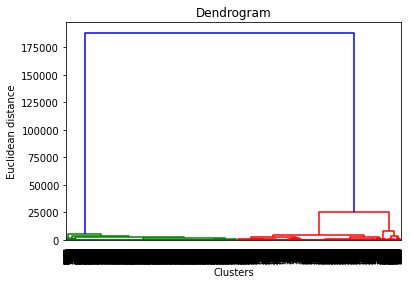

In [30]:
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [33]:
y_hc=hc.fit_predict(X)

In [35]:
print(y_hc)

[1 1 0 ... 1 1 1]


In [77]:
y_hc.size

12083

In [91]:
print(df_plot)

               Value Column      num
0         329.996735      2        0
300       330.208771      2      300
400      2309.598389      4      400
600       329.727112      2      600
900       360.813446      2      900
...              ...    ...      ...
1988400   330.318817      2  1988400
1988500   363.662292      4  1988500
1988700   331.320648      2  1988700
1989000   330.544861      2  1989000
1989300   330.223846      2  1989300

[12083 rows x 3 columns]


In [92]:
df_plot.reset_index(drop=True, inplace=True)
print(df_plot)

             Value Column      num
0       329.996735      2        0
1       330.208771      2      300
2      2309.598389      4      400
3       329.727112      2      600
4       360.813446      2      900
...            ...    ...      ...
12078   330.318817      2  1988400
12079   363.662292      4  1988500
12080   331.320648      2  1988700
12081   330.544861      2  1989000
12082   330.223846      2  1989300

[12083 rows x 3 columns]


In [56]:
new_series = pd.Series(y_hc)

In [66]:
conv_ser_df = new_series.to_frame()

In [76]:
print(conv_ser_df)

       labels
0           1
1           1
2           0
3           1
4           1
...       ...
12078       1
12079       1
12080       1
12081       1
12082       1

[12083 rows x 1 columns]


In [84]:
conv_ser_df.equals(df_plot)

False

In [70]:
conv_ser_df.columns = ['labels']

In [71]:
conv_ser_df.labels.unique()

array([1, 0, 2])

In [93]:
df_plot = pd.concat([df_plot, conv_ser_df], axis=1) 

In [96]:
print(df_plot)

             Value  labels
0       329.996735       1
1       330.208771       1
2      2309.598389       0
3       329.727112       1
4       360.813446       1
...            ...     ...
12078   330.318817       1
12079   363.662292       1
12080   331.320648       1
12081   330.544861       1
12082   330.223846       1

[12083 rows x 2 columns]


In [95]:
df_plot.drop(['Column','num'],axis='columns', inplace=True)

In [97]:
df_plot.to_csv("hc_labeling.csv")

In [116]:
len(df_plot.index)

12083

In [98]:
dfhc_label_0= df_plot[df_plot['labels']==0].copy()

In [104]:
print(dfhc_label_0)

             Value  labels
2      2309.598389       0
10     2321.235107       0
91     2337.567627       0
92     2381.911865       0
93     2291.888184       0
...            ...     ...
11869  2294.967285       0
11876  2296.531738       0
11920  2304.652344       0
11933  2303.780762       0
11990  2306.362305       0

[724 rows x 2 columns]


In [108]:
dfhc_label_0['Value'].std()

226.1065475240539

In [117]:
len(dfhc_label_0.index)

724

In [100]:
dfhc_label_1= df_plot[df_plot['labels']==1].copy()

In [105]:
print(dfhc_label_1)

            Value  labels
0      329.996735       1
1      330.208771       1
3      329.727112       1
4      360.813446       1
5      330.187531       1
...           ...     ...
12078  330.318817       1
12079  363.662292       1
12080  331.320648       1
12081  330.544861       1
12082  330.223846       1

[6151 rows x 2 columns]


In [110]:
dfhc_label_1['Value'].std()

65.11521128357079

In [118]:
len(dfhc_label_1.index)

6151

In [102]:
dfhc_label_2= df_plot[df_plot['labels']==2].copy()

In [107]:
print(dfhc_label_2)

             Value  labels
86     2599.917969       2
89     2509.802246       2
376    2623.934082       2
377    2529.280518       2
379    2600.648438       2
...            ...     ...
11184  2612.839111       2
11254  2550.220215       2
11657  2521.514404       2
11825  2551.750732       2
11932  2495.293701       2

[5208 rows x 2 columns]


In [112]:
dfhc_label_2['Value'].std()

58.40746613488687

In [119]:
len(dfhc_label_2.index)

5208

In [122]:
label_1_cl = dfhc_label_1.iloc[:, [0]].values

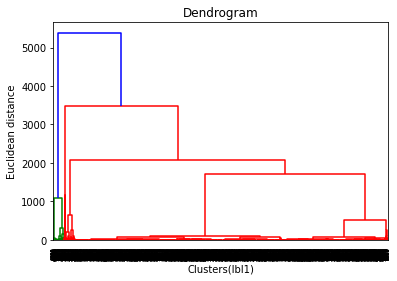

In [123]:
dendrogram = sch.dendrogram(sch.linkage(label_1_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl1)')
plt.ylabel('Euclidean distance')
plt.show()

In [124]:
label_2_cl = dfhc_label_2.iloc[:, [0]].values

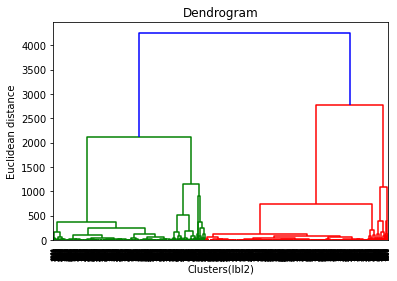

In [125]:
dendrogram = sch.dendrogram(sch.linkage(label_2_cl, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Clusters(lbl2)')
plt.ylabel('Euclidean distance')
plt.show()

Text(0, 0.5, 'Value')

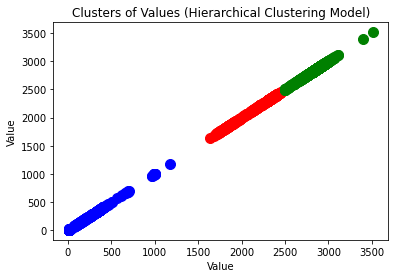

In [37]:
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 0], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 0], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 0], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of Values (Hierarchical Clustering Model)')
plt.xlabel('Value')
plt.ylabel('Value')
plt.show()